In [354]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [355]:
wea = pd.read_json('austin_weather_sept_thru_nov18.json')

In [356]:
wea.head()

,city_id,clouds,dt,dt_iso,main,rain,weather,wind
0,4671654,{'all': 1},1535760000,2018-09-01 00:00:00 +0000 UTC,"{'temp': 308.22, 'temp_min': 307.15, 'temp_max...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 4, 'deg': 140}"
1,4671654,{'all': 1},1535763600,2018-09-01 01:00:00 +0000 UTC,"{'temp': 306.64, 'temp_min': 305.95, 'temp_max...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3, 'deg': 120}"
2,4671654,{'all': 1},1535767200,2018-09-01 02:00:00 +0000 UTC,"{'temp': 304.94, 'temp_min': 303.75, 'temp_max...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2, 'deg': 130}"
3,4671654,{'all': 1},1535770800,2018-09-01 03:00:00 +0000 UTC,"{'temp': 303.68, 'temp_min': 302.35, 'temp_max...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 4, 'deg': 150}"
4,4671654,{'all': 1},1535774400,2018-09-01 04:00:00 +0000 UTC,"{'temp': 302.04, 'temp_min': 301.15, 'temp_max...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2, 'deg': 170}"


In [357]:
main=wea["main"].values.tolist()

In [358]:
weather=pd.DataFrame(main)

In [359]:
weather = weather.set_index(pd.to_datetime(wea['dt'], unit='s')) 

In [426]:
weather.head()

,humidity,pressure,temp,temp_max,temp_min
dt,,,,,
2018-09-01 00:00:00,33,1012,308.22,309.25,307.15
2018-09-01 01:00:00,37,1012,306.64,307.05,305.95
2018-09-01 02:00:00,39,1012,304.94,306.45,303.75
2018-09-01 03:00:00,55,1014,303.68,305.35,302.35
2018-09-01 04:00:00,60,1014,302.04,302.65,301.15


In [391]:
a=(weather["temp_max"].resample("D").max()-273.15)*9/5+32
b=(weather["temp_min"].resample("D").min()-273.15)*9/5+32 
c=weather["humidity"].resample("D").mean()

In [392]:
X=pd.DataFrame({"constant":1,"temp_max":a,"temp_min":b,"humidity":c})

In [425]:
X.head()

,constant,temp_max,temp_min,humidity
dt,,,,
2018-09-01,1,98.06,71.06,57.833333
2018-09-02,1,98.06,72.86,57.833333
2018-09-03,1,95.00,73.40,71.708333
2018-09-04,1,93.20,72.32,82.458333
2018-09-05,1,95.00,73.40,75.375000


In [361]:
step=pd.read_csv("Step Counts - KC Steps.csv")

In [423]:
step.head()

,Date,steps
0,9/1/18,2736
1,9/2/18,8901
2,9/3/18,334
3,9/4/18,4182
4,9/5/18,9232


In [383]:
y=step.iloc[:-1,:]

In [385]:
y=y["steps"].values.reshape(79,1)

In [446]:
theta=np.array([1215.23927059,41.13028054,-11.34748777,28.91362573])
alpha = 0.00005

In [430]:
def new_weight(X,y,theta,alpha):
    theta = theta - alpha*(X@theta.T-y)*X
    return theta

In [431]:
def computecost(X,y,theta):
    inner = np.power((np.matmul(X,theta.T)-y),2)
    return inner

In [432]:
X.values.shape

(79, 4)

In [433]:
y.shape

(79, 1)

In [447]:
t=[]
c=[]
s=[]
for i in range(len(y)):
    theta=new_weight(X.values[i],y[i],theta,alpha)
    st=np.dot(X.values[i],theta)
    cost=computecost(X.values[i],y[i],theta)
    s.append(st)
    t.append(theta)
    c.append(cost)

In [455]:
t[-1]

array([1215.34949304,   45.47702315,  -19.00725233,   49.8491299 ])

In [449]:
s

[3071.974384535338,
 8393.164652016549,
 520.5410410948432,
 4310.508089600082,
 9255.908132909575,
 9122.712909106243,
 5870.857165631935,
 1282.9436962788395,
 1107.829100576866,
 6419.857936826347,
 7767.448245440022,
 6889.3307754845955,
 4632.521095933345,
 8608.984312540946,
 7348.792157068175,
 867.2449585605923,
 8168.387246128224,
 7293.085420986447,
 6765.75232264315,
 4631.848596747232,
 5890.066711904985,
 3556.1860087458376,
 1054.7456066572581,
 5092.896862359329,
 7278.91684525875,
 6616.086060211517,
 7363.134973700586,
 3299.3526302235978,
 4529.918432070148,
 591.5274209236209,
 10406.061679847862,
 8287.858760280376,
 7361.569304422904,
 7750.589228308112,
 6705.7544533867995,
 784.3583625445,
 2126.4944000109263,
 5602.541685657643,
 5656.367623635257,
 7747.505897521742,
 6706.738557860164,
 4787.948314514846,
 8966.38229048936,
 4322.707155428465,
 6031.028780089775,
 6949.367205025073,
 4832.274167735017,
 5607.039458992823,
 3970.7603805447043,
 1342.50711071099

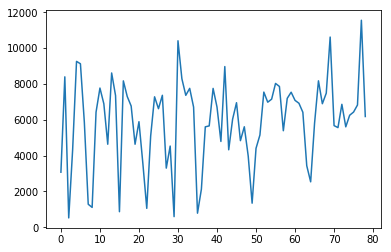

In [450]:
plt.plot(s)

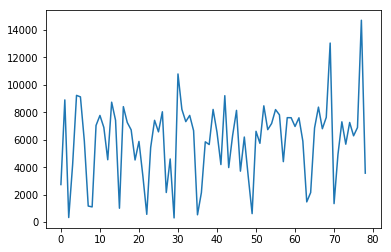

In [451]:
plt.plot(y)

In [452]:
test_wea1=np.array([1,70,49,47.5])

In [453]:
test_step=np.array([5738])

In [456]:
new=new_weight(test_wea,test_step,t[-1],alpha)

In [457]:
prediction=np.dot(test_wea,t[-1])

In [458]:
prediction


5835.2194193121